<a href="https://colab.research.google.com/github/peshqa/MMO_lab/blob/main/MMO_lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#import fbprophet

In [2]:
from sklearn.metrics import mean_absolute_error

In [27]:
df = pd.read_csv('candy_production.csv')
df.head()

,observation_date,IPG3113N
0,1972-01-01,85.6945
1,1972-02-01,71.8200
2,1972-03-01,66.0229
3,1972-04-01,64.5645
4,1972-05-01,65.0100


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   observation_date  548 non-null    object 
 1   IPG3113N          548 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.7+ KB


In [28]:
df.index = pd.to_datetime(df['observation_date'], dayfirst=False )
df['value'] = df["IPG3113N"]
df = df.drop(['observation_date', 'IPG3113N'], axis=1)
df.head()

,value
observation_date,
1972-01-01,85.6945
1972-02-01,71.8200
1972-03-01,66.0229
1972-04-01,64.5645
1972-05-01,65.0100


In [7]:
df.isnull().sum(axis=0)

,0
value,0


<Axes: xlabel='value', ylabel='Density'>

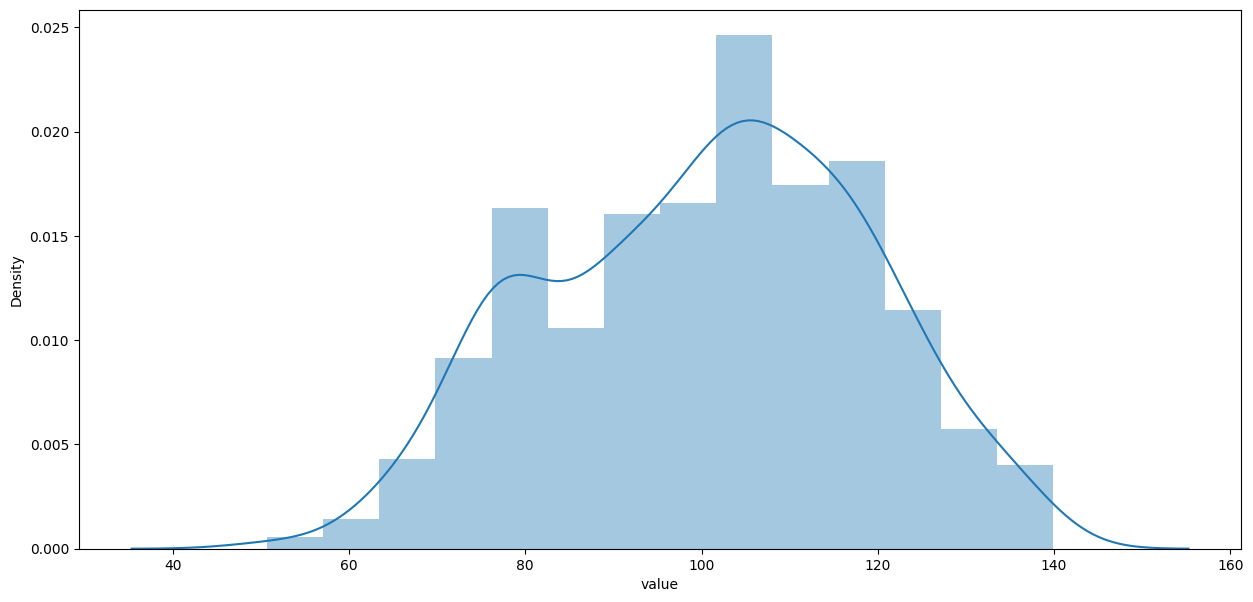

In [29]:
sns.distplot(df['value'])

<Axes: xlabel='observation_date', ylabel='value'>

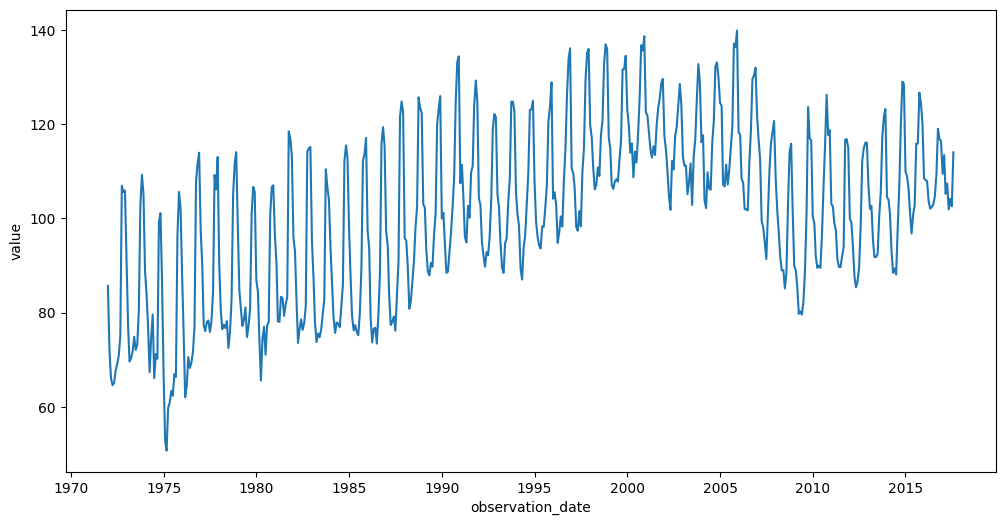

In [30]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df['value'])

In [23]:
df.index


DatetimeIndex(['1972-01-01', '1972-01-02', '1972-01-03', '1972-01-04',
               '1972-01-05', '1972-01-06', '1972-01-07', '1972-01-08',
               '1972-01-09', '1972-01-10',
               ...
               '2016-01-11', '2016-01-12', '2017-01-01', '2017-01-02',
               '2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
               '2017-01-07', '2017-01-08'],
              dtype='datetime64[ns]', name='observation_date', length=548, freq=None)

In [32]:
df['year'] = df.index.year
df['month'] = df.index.month
df['weekday'] = df.index.weekday

df.head()

,value,year,month,weekday
observation_date,,,,
1972-01-01,85.6945,1972,1,5
1972-02-01,71.8200,1972,2,1
1972-03-01,66.0229,1972,3,2
1972-04-01,64.5645,1972,4,5
1972-05-01,65.0100,1972,5,0


<Axes: xlabel='year', ylabel='value'>

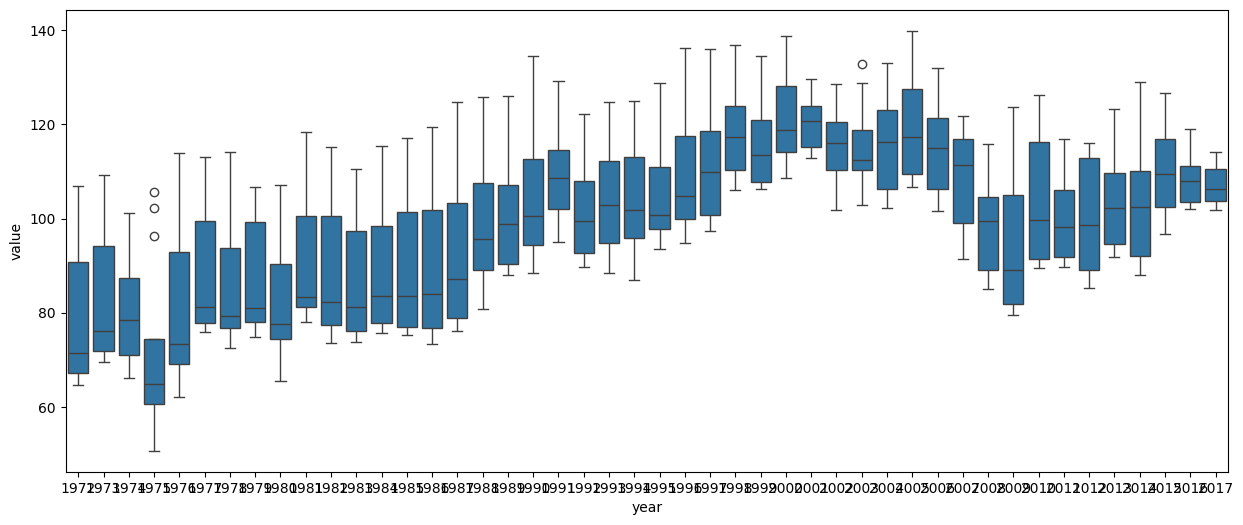

In [33]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='year', y='value', data=df)

<Axes: xlabel='month', ylabel='value'>

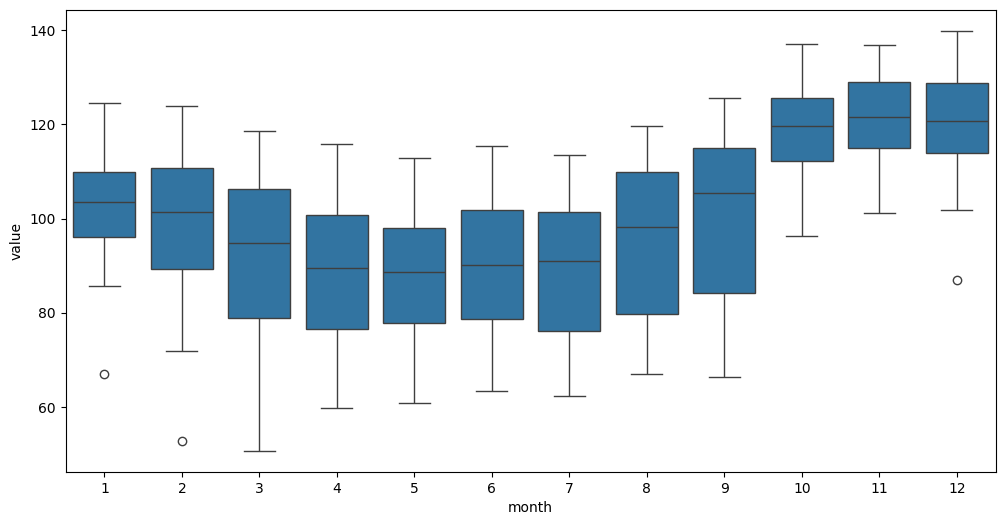

In [34]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='value', data=df)

<Axes: xlabel='weekday', ylabel='value'>

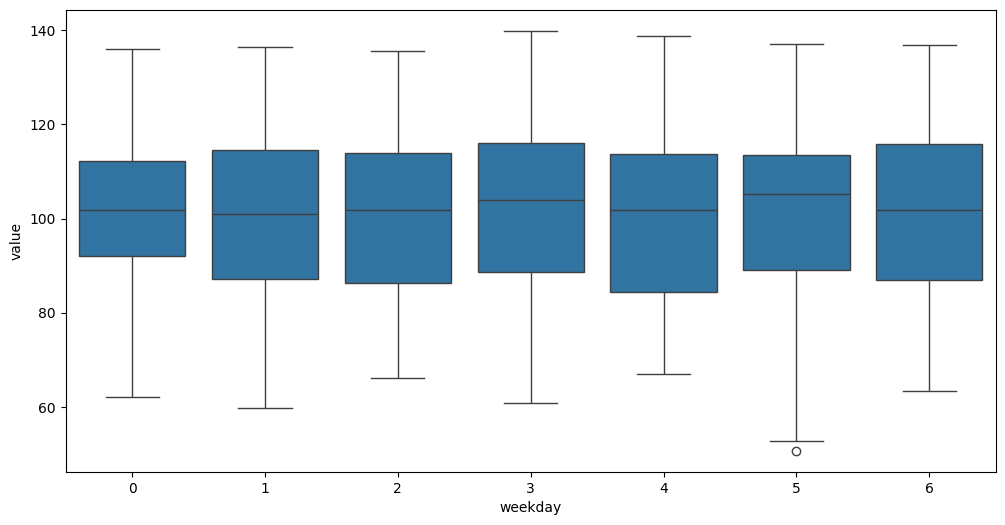

In [35]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='weekday', y='value', data=df)

In [36]:
prophetdf = pd.DataFrame()
prophetdf['ds'] = df.index
prophetdf['y'] = df['value'].values

In [37]:
prophetdf_train = prophetdf[:-20]
prophetdf_test = prophetdf[-20:]

In [38]:
from prophet import Prophet

In [39]:
model = Prophet(weekly_seasonality=False, changepoint_range=1, changepoint_prior_scale=0.75)
model.fit(prophetdf_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsregpmik/bmbhfawm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsregpmik/dfo9v28z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2342', 'data', 'file=/tmp/tmpsregpmik/bmbhfawm.json', 'init=/tmp/tmpsregpmik/dfo9v28z.json', 'output', 'file=/tmp/tmpsregpmik/prophet_modeltil6jy1d/prophet_model-20241107001240.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:12:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:12:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [40]:
future = model.make_future_dataframe(periods=20, freq='M')
forecast = model.predict (future)

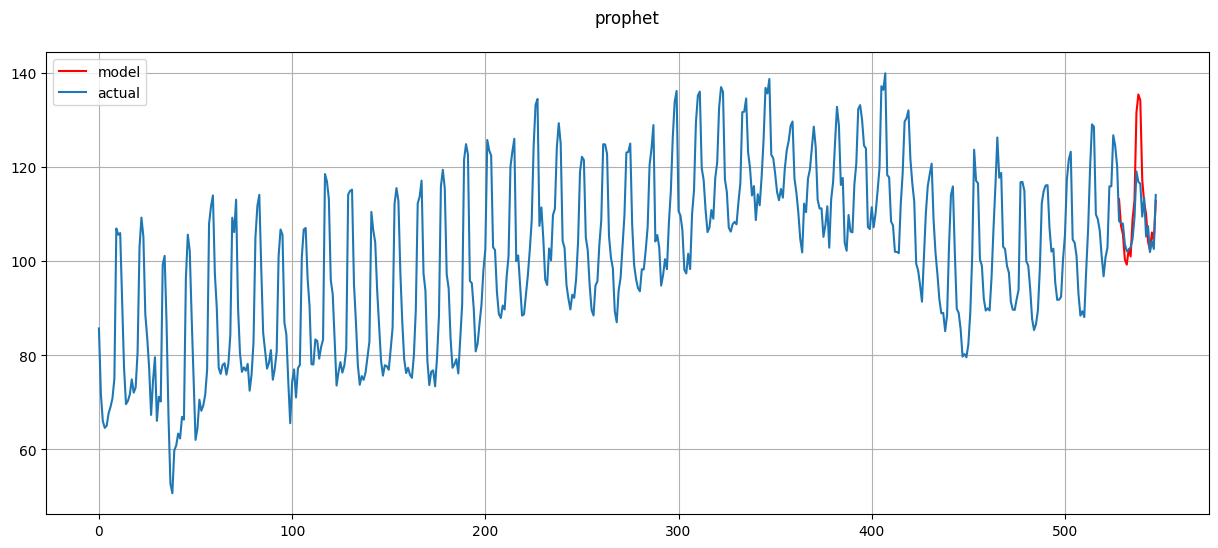

In [41]:
plt.figure(figsize=(15, 6))
plt.plot(forecast.yhat[-20:], color='r', label="model")
plt.title("prophet\n")
plt.plot(prophetdf['y'].values[:], label="actual")

plt.legend()
plt.grid(True)

In [42]:
mean_absolute_error(prophetdf.y[-20:], forecast.yhat[-20:])

4.721602986154997

In [46]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential

from keras.layers import Dense

from keras.layers import LSTM

dataset = df['value'].values

scaler = MinMaxScaler(feature_range = (0, 1))
dataset1 = scaler.fit_transform(dataset.reshape(-1, 1))
len(dataset1)

548

In [51]:
# split into train and test sets
train_size = int(len(dataset1) * 0.9)
test_size = len(dataset1) - train_size

train, test = dataset1[0:train_size], dataset1[train_size:len(dataset) ]
print(len(train), len(test))

493 55


In [53]:
def create_dataset(dataset2, look_back):

  dataX=[ ]

  dataY =[]

  for i in range(len(dataset2)-look_back):
    a = dataset2[i:(i+look_back) ]
    dataX.append(a)
    dataY.append(dataset2[i + look_back])

  return np.array(dataX), np.array(dataY)

look_back=3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

model = Sequential()

model.add(LSTM(4, input_shape=(1, look_back)))

model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['R2Score'])
model.fit(trainX, trainY, epochs=10, batch_size=1, verbose=2)

Epoch 1/10
490/490 - 3s - 5ms/step - R2Score: -5.1686e-01 - loss: 0.0653
Epoch 2/10
490/490 - 1s - 3ms/step - R2Score: 0.5802 - loss: 0.0181
Epoch 3/10
490/490 - 1s - 1ms/step - R2Score: 0.6463 - loss: 0.0152
Epoch 4/10
490/490 - 1s - 1ms/step - R2Score: 0.6956 - loss: 0.0131
Epoch 5/10
490/490 - 1s - 3ms/step - R2Score: 0.7307 - loss: 0.0116
Epoch 6/10
490/490 - 1s - 1ms/step - R2Score: 0.7544 - loss: 0.0106
Epoch 7/10
490/490 - 1s - 3ms/step - R2Score: 0.7641 - loss: 0.0101
Epoch 8/10
490/490 - 1s - 1ms/step - R2Score: 0.7699 - loss: 0.0099
Epoch 9/10
490/490 - 3s - 6ms/step - R2Score: 0.7748 - loss: 0.0097
Epoch 10/10
490/490 - 2s - 4ms/step - R2Score: 0.7757 - loss: 0.0096


In [55]:
from sklearn.metrics import mean_squared_error
from math import *
trainPredict = model.predict(trainX)

testPredict = model.predict(testX)

trainPredict = scaler.inverse_transform(trainPredict)
testPredict = scaler.inverse_transform(testPredict)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


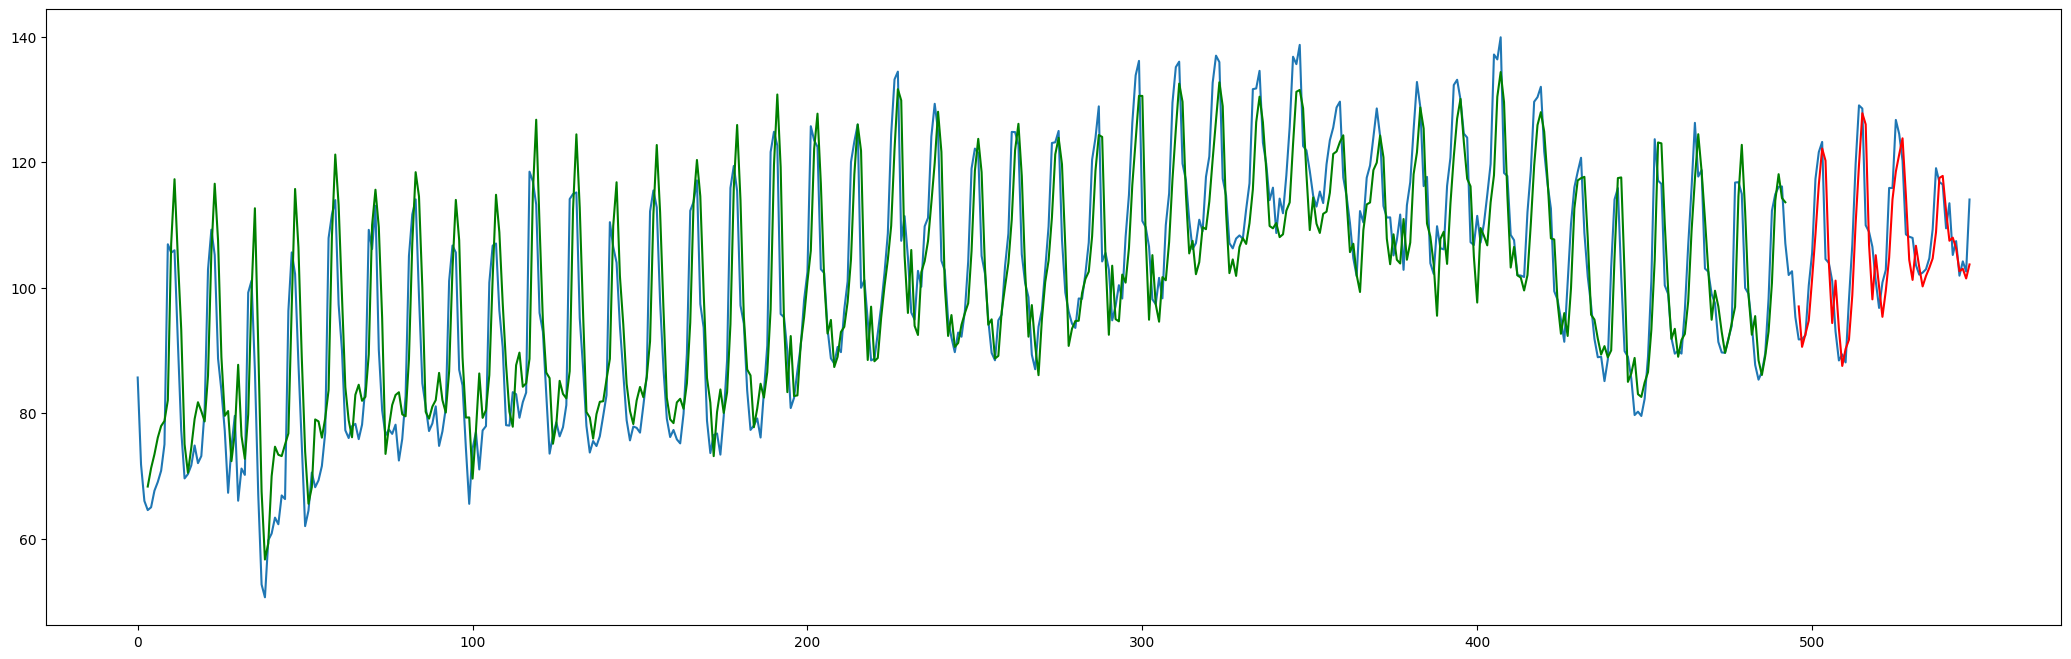

In [57]:
from sklearn.metrics import r2_score

plt.figure(figsize=(26, 8))
trainPredictPlot = np.empty_like(dataset1)

trainPredictPlot[:, :] = np.nan

trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = np.empty_like(dataset1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+2*look_back:len(dataset1), :] = testPredict

plt.plot(scaler.inverse_transform(dataset1 ) )
plt.plot(trainPredictPlot, color="g")
plt.plot(testPredictPlot,color='r')

plt.show()

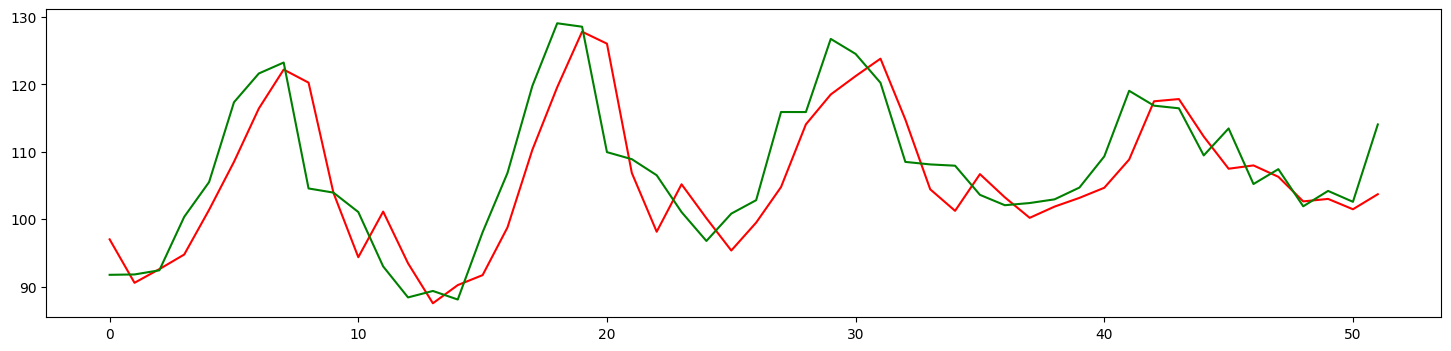

In [59]:
plt.figure(figsize=(18, 4))
plt.plot(testPredict,color='r')

plt.plot(scaler.inverse_transform(testY),color='g')

plt.show()

In [61]:
print(r2_score(testPredict,scaler.inverse_transform(testY)))

0.6250689621697672
